In [46]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as pl
from scipy.misc import logsumexp

mplparams = { \
      'backend': 'Agg',
      'text.usetex': True, # use LaTeX for all text
      'axes.linewidth': 0.5, # set axes linewidths to 0.5
      'axes.grid': True, # add a grid
      'grid.linewidth': 0.5,
      'font.family': 'sans-serif',
      'font.sans-serif': 'Avant Garde, Helvetica, Computer Modern Sans serif',
      'font.size': 17 }

mpl.rcParams.update(mplparams)

def logtrapz(lnf, dx):
    return np.log(dx/2.) + logsumexp([logsumexp(lnf[:-1]), logsumexp(lnf[1:])])

# Signal vs. Noise and Coherent vs. Incoherent odds

This note book is to look at how we might expect odds values (ratios of evidences) to vary with signal-to-noise ratio. We will take the simple case of two Gaussian datasets both of the same length ($N = 100$) and standard deviation, $\sigma$. Both datasets contains a mean offset of $\mu_h = 5$, and we are concerned with a search over the mean parameter. We want to calculate two things: the odds for a mean offset versus the data being Gaussian noise with a known mean of zero; and, the odds for both datasets containing the same mean offset (a coherent signal) versus them containing two independent mean offsets (an incoherent signal). We can try and work out what to expect analytically, and then see if that's actually the case.

To set up the situation, we have the two datasets $d_1$ and $d_2$, which have likelihoods given by
$$
p(d_j|\mu) = \left(\frac{1}{2\pi\sigma^2}\right)^{(N/2)} \exp{\left(-\frac{\sum_i^N (d_{j,i}-\mu_i)^2}{2\sigma^2}\right)},
$$
and priors on $\mu$ given by $p(\mu)$, which we will take as constant (i.e. a flat prior). We will also use the fact that $d_{j,i} = \mu_t + n_{j,i}$ where $n_{j,i}$ is a value drawn from a Gaussian distribution of zero mean and standard deviation $\sigma$.

The evidence is generally given by
$$
Z = \int_{\mu_{\text{min}}}^{\mu_{\text{max}}} p(d|\mu) p(\mu) {\text{d}\mu}.
$$

## Coherent signal vs. noise odds

For large signal-to-noise ratios (SNRs) the relation between signal versus noise evidence for Gaussian noise is a well known thing, but we'll write it out here. Formally, for our two data steams, we have
$$
\mathcal{O} = \frac{Z_{S}}{Z_{N}} = (2\pi\sigma^2)^{-N} \frac{p(\mu)}{Z_{N}} \int_{\mu_{\text{min}}}^{\mu_{\text{max}}} p(d_1|\mu) p(d_2|\mu) {\text{d}\mu}.
$$
We find that for high SNR the integral
$$
\int_{\mu_{\text{min}}}^{\mu_{\text{max}}} p(d|\mu) \text{d}\mu \approx p(d|\mu=\mu_{t/\text{ML}}) \left(\frac{2\pi\sigma^2}{N} \right)^{1/2},
$$
where $p(d|\mu=\mu_{t/\text{ML}})$ is the likelihood at the true/maximum likelihood value of $\mu$. This value, for the joint datasets, can be seen to be
$$
p(\{d\}|\mu=\mu_{t/\text{ML}}) = \left(\frac{1}{2\pi\sigma^2}\right)^{N} \exp{\left(-\frac{1}{2\sigma^2}\sum_i^N \left[(d_{1,i} - \mu_t)^2 + (d_{2,i} - \mu_t)^2 \right]\right)},
$$
which in turn (with $d_{j,i} = \mu_t + n_{j,i}$) becomes
$$
p(\{d\}|\mu=\mu_{t/\text{ML}}) = \left(\frac{1}{2\pi\sigma^2}\right)^{N} \exp{\left(-\frac{1}{2\sigma^2}\sum_i^N \left[ n_{1,i}^2 + n_{2,i}^2 \right]\right)} \approx \left(\frac{1}{2\pi\sigma^2}\right)^{N} \exp{(-N)},
$$
where we have used $\sum_i^N n_i^2/\sigma^2 \approx N \pm \sqrt{N}$. Similarly, we have the noise evidence
$$
Z_N = \left(\frac{1}{2\pi\sigma^2}\right)^{N} \exp{\left(-\frac{1}{2\sigma^2}\sum_i^N \left[2\mu_t^2 + (n_{1,i}^2 + n_{2,i}^2) - 2\mu_t(n_{1,i} + n_{2,i}) \right] \right)} \approx \left(\frac{1}{2\pi\sigma^2}\right)^{N}\exp{\left(-N - \sum_i^N \frac{\mu_t^2}{\sigma^2} \right)},
$$
where we use the approximation that $\sum_i^N \mu_t n_{j,i} \approx 0$. So, the odds becomes
$$
\mathcal{O} \approx \left(\frac{2\pi\sigma^2}{N} \right)^{1/2}p(\mu)\exp{\left(\sum_i^N \frac{\mu_t^2}{\sigma^2}\right)},
$$
where we can also say that the single dataset SNR is defined as $\rho^2 = \sum_i^N \mu_t^2/\sigma^2 = N\left(\mu_t/\sigma\right)^2$, and in this case $\rho_{\text{coh}} = \sqrt{2}\rho$ , and we can see that if we take the natural logarithm of this that
$$
\ln{\mathcal{O}} = \ln{(p(\mu))} + \frac{1}{2}\ln{\left(\frac{2\pi\sigma^2}{N}\right)} + \frac{1}{2}\rho_{\text{coh}}^2.
$$
We see here that the log odds is proportional to $\rho^2$, with a minor influence from the $\ln{\left(2\pi\sigma^2/N\right)}$ term which is roughly equivalent to $\ln{\left(2\pi\rho^{-2}\right)}$. Empirically (and probably with some mathematical justification that can be derived) this approximation seems to give the median odds value on random realisations of noise, even down to low SNR.

## Coherent signal vs. incoherent signal

We can define a coherent signal versus incoherent signal odds ratio as
$$
\mathcal{O}^{S}_I = \frac{Z_{\text{coh}}}{Z_{\text{incoh}}} = \frac{Z_{\{d\}}}{Z_{d_1}Z_{d_2}}.
$$
Using the same approximations as above we find that
$$
\mathcal{O}^{S}_I \approx \frac{1}{2\sqrt{\pi}}\frac{1}{p(\mu)}\frac{\sqrt{N}}{\sigma}.
$$
In this we see that there is the Occam factor of $1/p(\mu)$ accounting for the fact that the incoherent model has an extra parameter. We also see that this is proportional to $\sqrt{N}/\sigma$ which is roughly equivalent to $\rho$.

So we see that for the coherent signal versus noise odds roughly scales with $e^{\rho^2}$, whilst the coherent signal versus incoherent signal odds roughly scales with $\rho$, i.e. it's scaling is a lot shallower. Empirically (and probably with some mathematical justification that can be derived) this approximation seems to give the maximum odds value on random realisations of noise down to low SNR.

In [32]:
# show the above scaling on some simulated datasets

# set mean of data
hmu = 5.

# set standard deviations of two datasets
sigmas = [1.0, 1.0]

# set lengths of two data sets
lengths = [100, 100]

# set range of h's to search over
hmin = 0.
hmax = 10.
Nh = 10000
hs = np.linspace(hmin, hmax, Nh)

# h range for lower SNR cases
hslarge = np.linspace(-100., 100., Nh)

# log of the prior
#logprior = -np.log(hmax-hmin)
# artificially increase the prior range to show that the two odds cross 
logprior = -np.log(1e5-0.) 

# noise scales to change SNR
nscales = 1./np.logspace(-1.3, 1.3, 10)

lnBCIsall = []
lnBSNsall = []

for k in range(30):
    lnBSNs = []
    lnBCIs = []
    snrstot = []
    snrsind = []

    for nscale in nscales:
        # create two data sets with Gaussian noise + hmu
        ds = []
        snrs = [] # signal to noise ratios
        for i in range(2):
            ds.append(hmu + nscale*sigmas[i]*np.random.randn(lengths[i]))
            snrs.append(np.sqrt(lengths[i])*hmu/(nscale*sigmas[i]))
        snrsind.append(snrs)
        
        snrtot = np.sqrt(np.sum(np.array(snrs)**2))
        snrstot.append(snrtot)

        # get the individual and joint log likelihoods, and noise evidences
        loglikes = []
        normCs = []
        noiseZs = []
        loglikejoint = np.zeros(Nh)
        noiseZsjoint = 0.
        
        # use different hs ranges for different values
        if nscale > 1:
            hsv = hslarge
        else:
            hsv = hs
        
        for i in range(2):
            loglike = np.zeros(Nh)
            normCs.append(-(lengths[i]/2.)*np.log(2.*np.pi*(nscale*sigmas[i])**2))
            for j in range(Nh):
                loglike[j] = normCs[-1] - 0.5*np.sum((ds[i]-hsv[j])**2)/(nscale*sigmas[i])**2
            loglikejoint += loglike
            loglikes.append(loglike)
            noiseZs.append(normCs[-1] - 0.5*np.sum(ds[i]**2)/(nscale*sigmas[i])**2)
            noiseZsjoint += noiseZs[-1]

        # get individual signal evidences
        Zs = []
        for i in range(2):
            Zs.append(logtrapz(loglikes[i], hsv[1]-hsv[0]) + logprior)
        Zjoint = logtrapz(loglikejoint, hsv[1]-hsv[0]) + logprior
    
        lnBSNs.append(Zjoint-noiseZsjoint)
        lnBCIs.append(Zjoint - np.sum(Zs))
    lnBCIsall.append(np.array(lnBCIs))
    lnBSNsall.append(np.array(lnBSNs))
    
snrstot = np.array(snrstot)

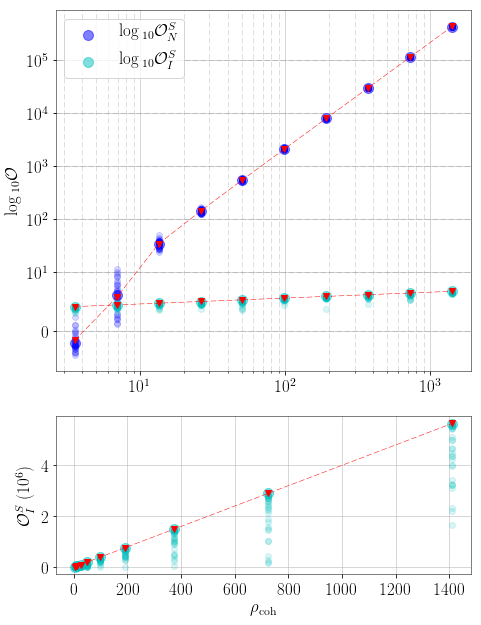

In [47]:
fig = pl.figure(figsize=(7, 9))
ax1 = pl.subplot2grid((3,1), (0,0), rowspan=2)
ax2 = pl.subplot2grid((3,1), (2,0), rowspan=1)

for lnBSNsi, lnBCIsi in zip(lnBSNsall, lnBCIsall):
    ax1.loglog(snrstot, lnBSNsi/np.log(10.), 'bo', ms=6, alpha=0.15)
    ax1.loglog(snrstot, lnBCIsi/np.log(10.), 'co', ms=6, alpha=0.15)
    #ax2.semilogx(snrstot, np.exp(np.array(lnBSNsi)), 'bo', ms=6, alpha=0.3)
    ax2.plot(snrstot, np.exp(lnBCIsi), 'co', ms=6, alpha=0.15)
ax1.loglog(snrstot, np.median(lnBSNsall, axis=0)/np.log(10.), 'bo', ms=10, alpha=0.5, label='$\log{}_{10}\mathcal{O}^S_N$')
ax1.loglog(snrstot, np.max(lnBCIsall, axis=0)/np.log(10.), 'co', ms=10, alpha=0.5, label='$\log{}_{10}\mathcal{O}^S_I$')
ax2.plot(snrstot, np.exp(np.max(lnBCIsall, axis=0)), 'co', ms=10, alpha=0.5)

# plot the calculated approximation for the signal vs noise odds
approxV = logprior + 0.5*np.log(2.*np.pi*(nscales*sigmas[0])**2/lengths[0]) + 0.5*np.array(snrstot)**2
ax1.loglog(snrstot, approxV/np.log(10.), 'rv--', lw=0.5)
#ax2.semilogx(snrstot[snrstot < 20.], np.exp(approxV[snrstot < 20.]), 'rv--', lw=0.5)

# plot the calulated approximation to the coherent vs incoherent odds
approxV = -0.5*np.log10(4.*np.pi) - (logprior/np.log(10.)) + 0.5*np.log10(lengths[0]) - np.log10(nscales*sigmas[0])
ax1.loglog(snrstot, approxV, 'rv--', lw=0.5)
ax2.plot(snrstot, 10**approxV, 'rv--', lw=0.5)

ax1.set_yscale('symlog', linthreshy=10)
#ax2.set_ylim([ax1.get_ylim()[0], 1.1*np.max(10**approxV)])
ax1.grid('on')
ax2.grid('on')

ax1.grid(b=True, which='minor', color='k', linestyle='--', lw=0.5, alpha=0.25)
ax2.grid(b=True, which='minor', color='k', linestyle='--', lw=0.5, alpha=0.25)

#ax1.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
ax1.tick_params(axis='y', which='minor', left='on')

yfmt = mpl.ticker.ScalarFormatter()
yfmt.set_powerlimits((0,0))
xfmt = mpl.ticker.ScalarFormatter()
xfmt.set_powerlimits((0, 10))
ax2.yaxis.set_major_formatter(yfmt)
ax2.xaxis.set_major_formatter(xfmt)

pl.draw()
exponent_text = ax2.yaxis.get_offset_text().get_text()
exponent_text = exponent_text.replace(r"\mathdefault", "")
exponent_text = exponent_text.replace(r"\times", "")
exponent_text = exponent_text.replace(r"$", "")
ax2.yaxis.offsetText.set_visible(False)

ax1.set_ylabel(r'$\log{}_{10}\mathcal{O}$')
ax2.set_xlabel(r'$\rho_{\rm{coh}}$')

ax2.set_ylabel(r'$\mathcal{{O}}_I^S~({})$'.format(exponent_text))

ax1.legend(loc='best')

pl.tight_layout()

In [201]:
np.max(lnBSNsall, axis=0)

array([  1.38518655e+01,   4.23452232e+01,   1.45004389e+02,
         6.92764869e+02,   2.62859819e+03,   1.02989283e+04,
         6.32051264e+04,   2.51431981e+05,   1.00271377e+06])

In [31]:
print 1./np.logspace(-1.3, 1.3, 10)

[ 19.95262315  10.25914365   5.27499706   2.71227258   1.39458325
   0.7170601    0.36869451   0.18957357   0.09747402   0.05011872]
